# 04 - Modelos Gráficos Causales


## Pensando en la Causalidad

¿Alguna vez has notado cómo esos cocineros en los videos de YouTube son excelentes para describir la comida? “Reducir la salsa hasta que alcance una consistencia aterciopelada”. Si recién estás aprendiendo a cocinar, no tienes idea de lo que esto significa. ¡Solo dame el tiempo que debo dejar esto en la estufa! Con la causalidad, es lo mismo. Supon que entras en un bar y escuchas a la gente discutiendo la causalidad (probablemente un bar al lado de un departamento de Economía). En ese caso, los escucharás decir cómo el _confusor_ de los ingresos dificultó identificar el efecto de la inmigración en ese vecindario, por lo que tuvieron que usar una variable instrumental. Y a estas alturas, es posible que no entiendas de qué están hablando. Pero solucionaré al menos parte de este problema ahora mismo. 

Los modelos gráficos son el lenguaje de la causalidad. No son solo lo que usas para hablar con otros aficionados (valientes y verdaderos) a la causalidad, sino también algo que usas para hacer que tus propios pensamientos sean más transparentes. 

Como punto de partida, tomemos la independencia condicional de los posibles resultados como ejemplo. Esta es una de las principales suposiciones que requerimos para que sea cierta al hacer inferencias causales:

$
(Y_0, Y_1) \perp T | X
$

La independencia condicional nos permite medir un efecto en el resultado únicamente debido al tratamiento y no a ninguna otra variable que esté al acecho. El ejemplo clásico de esto es el efecto de un medicamento en un paciente enfermo. Si solo los pacientes muy enfermos reciben el medicamento, incluso podría parecer que administrar el medicamento disminuye la salud de los pacientes. Eso es porque el efecto de la gravedad se está mezclando con el efecto de la droga. Si dividimos a los pacientes en casos graves y no graves y analizamos el impacto del fármaco en cada subgrupo, obtendremos una imagen más clara del efecto real. Este desglose de la población por sus características es lo que llamamos controlar o condicionar sobre X. Al condicionar sobre los casos graves, el mecanismo de tratamiento se vuelve casi aleatorio. Los pacientes dentro del grupo grave pueden o no recibir el fármaco solo por casualidad, ya no por una gravedad alta, ya que todos los pacientes son iguales en esta dimensión. Y si el tratamiento se asigna al azar dentro de los grupos, el tratamiento se vuelve condicionalmente independiente de los posibles resultados. 

La independencia y la independencia condicional son fundamentales para la inferencia causal. Sin embargo, puede ser bastante desafiante entenderlas. Pero esto puede cambiar si usamos el lenguaje correcto para describir este problema. Aquí es donde entran en juego los **modelos gráficos causales**. Un modelo gráfico causal es una forma de representar cómo funciona la causalidad en términos de qué causa qué. 

Un modelo gráfico se ve así

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
style.use("fivethirtyeight")

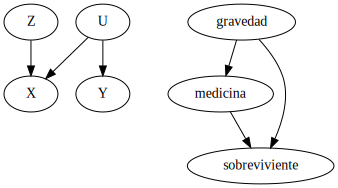

In [3]:
g = gr.Digraph()
g.edge("Z", "X")
g.edge("U", "X")
g.edge("U", "Y")

g.edge("medicina", "sobreviviente")
g.edge("gravedad", "sobreviviente")
g.edge("gravedad", "medicina")

g

Cada nodo es una variable aleatoria. Usamos flechas, o bordes, para mostrar si una variable causa otra. En el modelo gráfico de la izquierda, decimos que `Z` causa `X` y que `U` causa `X` e `Y`. Para dar un ejemplo más concreto, podemos traducir nuestros pensamientos sobre el impacto del medicamento en la supervivencia del paciente en el segundo gráfico anterior. La gravedad afecta tanto la medicina como la supervivencia, y la medicina también provoca la supervivencia. Como veremos, este lenguaje de modelos gráficos causales nos ayudará a aclarar nuestros pensamientos sobre la causalidad, ya que aclara nuestras creencias sobre cómo funciona el mundo. 

## Curso Intensivo en Modelos Gráficos

Hay [semestres enteros sobre modelos gráficos](https://www.coursera.org/specializations/probabilistic-graphical-models). Pero, para nuestro propósito, es (muy) importante que entendamos qué tipo de suposiciones de independencia e independencia condicional implica un modelo gráfico. Como veremos, la independencia fluye a través de un modelo gráfico como el agua fluye a través de un arroyo. Podemos detener este flujo o habilitarlo, dependiendo de cómo tratemos las variables en él. Para entender esto, examinemos algunas estructuras gráficas comunes y ejemplos. Serán bastante sencillos, pero son bloques de construcción suficientes para comprender todo sobre la independencia y la independencia condicional en modelos gráficos.

Primero, mira este gráfico muy simple. `A` causa `B`, `B` causa `C`. O `X` causa `Y` que causa `Z`.

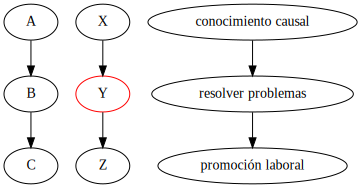

In [4]:
g = gr.Digraph()
g.edge("A", "B")
g.edge("B", "C")

g.edge("X", "Y")
g.edge("Y", "Z")
g.node("Y", "Y", color="red")


g.edge("conocimiento causal", "resolver problemas")
g.edge("resolver problemas", "promoción laboral")

g

En el primer gráfico, la dependencia fluye en la dirección de las flechas. Observa que la dependencia es simétrica, aunque es un poco menos intuitiva. Para dar un ejemplo más concreto, digamos que saber sobre la inferencia causal (_causal knowledge_ en inglés) es la única forma de resolver los problemas comerciales (_solve problems_), y resolver esos problemas es la única forma de obtener una promoción laboral (_job promotion_). Entonces, el conocimiento causal implica resolver problemas que causan una promoción laboral. Podemos decir aquí que la promoción laboral depende del conocimiento causal. Cuanto mayor sea la experiencia causal, mayores serán sus posibilidades de obtener una promoción. Además, cuanto mayores sean sus posibilidades de promoción, mayores serán sus posibilidades de tener conocimiento causal. De lo contrario, sería difícil conseguir un ascenso. 

Ahora, digamos que condiciono a la variable intermediaria. En este caso, la dependencia está bloqueada. Entonces, `X` y `Z` son independientes dado `Y`. En el gráfico anterior, el rojo indica que Y es una variable condicionada. Del mismo modo, en nuestro ejemplo, si sé que eres bueno resolviendo problemas, saber que conoces la inferencia causal no da más información sobre tus posibilidades de conseguir un ascenso en el trabajo. En términos matemáticos, $E[Promoción|Resolver \ problemas, Conocimiento \ causal]=E[Promoción|Resolver \ problemas]$. La inversa también es cierta, una vez que sé qué tan bueno eres para resolver problemas, conocer tus posibilidades de promoción laboral no me da más información sobre la probabilidad de que conozcas acerca de inferencia causal. 

Como regla general, el flujo de dependencia en el camino directo de `A` a `C` se bloquea cuando condicionamos a una variable intermediaria `B`. O,

$A \not \perp C$

y

$
A \perp C | B
$

Ahora, consideremos una estructura diferente, una **bifurcación**. La misma variable causa otras dos variables en la parte inferior del gráfico. En este caso, la dependencia fluye hacia atrás a través de las flechas y tenemos un **camino de puerta trasera**. Podemos cerrar el camino de la puerta trasera y acabar con la dependencia condicionando la causa común.

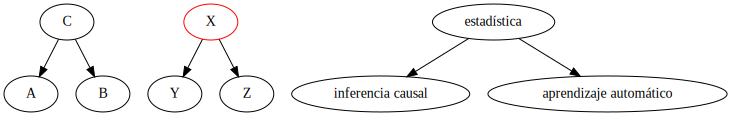

In [5]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")

g.edge("X", "Y")
g.edge("X", "Z")
g.node("X", "X", color="red")

g.edge("estadística", "inferencia causal")
g.edge("estadística", "aprendizaje automático")

g

Por ejemplo, supongamos que tu conocimiento en Estadística hace que sepas más sobre la Inferencia Causal y Aprendizaje Automático (_Machine Learning_). Si no conozco tu nivel de conocimiento estadístico, saber que eres bueno en Inferencia Causal hace que sea más probable que también seas bueno con el Aprendizaje Automático. Eso es porque, incluso si no conozco tu nivel de conocimiento estadístico, puedo inferirlo a partir de tu conocimiento en Inferencia Causal. Si eres bueno en la Inferencia Causal, probablemente seas bueno en Estadística, por lo que es más probable que seas bueno con el Aprendizaje Automático. 

Ahora, si condiciono tu conocimiento sobre Estadística, entonces cuánto sabes sobre el Aprendizaje Automático se vuelve independiente de cuánto sabes sobre Inferencia Causal. Conocer tu nivel de conocimiento en Estadística ya me brinda toda la información que necesito para inferir el nivel de tus habilidades para el Aprendizaje Automático. Es decir, conocer tu nivel de inferencia causal no proporcionará más información en este caso. 

Por regla general, dos variables que comparten una causa común son dependientes, pero independientes cuando condicionamos a la causa común. O

$A \not \perp  B$

y

$
A \perp B | C
$

La única estructura que falta es el **"colisionador"**. Un colisionador es cuando dos flechas chocan en una sola variable. Podemos decir que en este caso, ambas variables comparten un efecto común. 

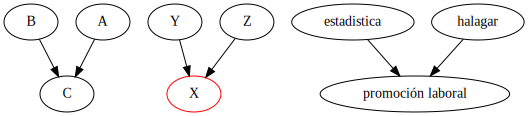

In [6]:
g = gr.Digraph()
g.edge("B", "C")
g.edge("A", "C")

g.edge("Y", "X")
g.edge("Z", "X")
g.node("X", "X", color="red")

g.edge("estadistica", "promoción laboral")
g.edge("halagar", "promoción laboral")

g

Por ejemplo, imagina que hay dos formas de obtener un ascenso en el trabajo. Puedes ser bueno en Estadística o halagar a tu jefe. Si no condiciono tu promoción laboral, es decir, no sé nada si la obtendrás o no, entonces tu nivel de Estadística y halagos son independientes. En otras palabras, saber qué tan bueno eres en Estadística no me dice nada acerca de qué tan bueno eres halagando a tu jefe. Por otro lado, si obtuviste un ascenso en el trabajo, de repente, conocer tu nivel de Estadística me dice sobre tu nivel de "_halagamiento_". Si eres malo en Estadística y obtuviste un ascenso, es probable que sepas cómo halagar. De lo contrario, no obtendrías un ascenso. Por el contrario, si eres malo halagando, debes ser bueno con la Estadística. Este fenómeno a veces se denomina **explicación** (_explaining away_), porque una causa ya explica el efecto, lo que hace que la otra causa sea menos probable.

Como regla general, el acondicionamiento en un colisionador abre el camino de la dependencia. No condicionarlo lo deja cerrado. O

$A \perp B$

y

$
A \not \perp B | C
$

Conociendo las tres estructuras, podemos derivar una regla aún más general. Una ruta está bloqueada si y solo si:
1. Contiene un no-colisionador que ha sido condicionado
2. Contiene un colisionador que no ha sido condicionado y no tiene descendientes que hayan sido condicionados.

Aquí hay un resumen sobre cómo fluye la dependencia en un gráfico. La he tomado de una [presentación en Stanford](http://ai.stanford.edu/~paskin/gm-short-course/lec2.pdf) por Mark Paskin. Las flechas con líneas en sus puntas significan independencia, y las flechas sin líneas en sus puntas significan dependencia.

![img](../../causal-inference-for-the-brave-and-true/data/img/graph-flow.png)

Como ejemplo final, trata de averiguar alguna relación de independencia y dependencia en el siguiente gráfico causal.
1. Is $D \perp C$?
2. Is $D \perp C| A $ ?
3. Is $D \perp C| G $ ?
4. Is $A \perp F $ ?
5. Is $A \perp F|E $ ?
6. Is $A \perp F|E,C $ ?

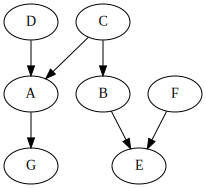

In [7]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")
g.edge("D", "A")
g.edge("B", "E")
g.edge("F", "E")
g.edge("A", "G")

g

**Answers**:
1. $D \perp C$. Contiene un colisionador que **no** ha sido acondicionado.
2. $D \not\perp C| A $. Contiene un colisionador al que ha sido condicionado.
3. $D \not\perp C| G $. Contiene el descendiente de un colisionador que ha sido condicionado. Puedes ver `G` como una especie de proxy para `A`.
4. $A \perp F $. Contiene un colisionador, `B`->`E`<-`F`, que **no** ha sido condicionado.
5. $A \not\perp F|E $. Contiene un colisionador, `B`->`E`<-`F`, al que ha sido condicionado.
6. $A \perp F|E, C $. Contiene un colisionador, `B`->`E`<-`F`, que ha sido condicionado, pero contiene un no-colisionador que ha sido condicionado. El condicionamiento en `E` abre el camino, pero el condicionamiento en `C` lo vuelve a cerrar.

Conocer los modelos gráficos causales nos permite comprender los problemas que surgen en la inferencia causal. Como hemos visto, el problema siempre se reduce al sesgo. 

$
E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATET} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0] \}}_{BIAS}
$

Los modelos gráficos nos permiten diagnosticar con qué sesgo estamos lidiando y cuáles son las herramientas que necesitamos para corregirlos.

## Sesgo de Confusión

![img](../../causal-inference-for-the-brave-and-true/data/img/causal-graph/both_crap.png)

La primera causa significativa de sesgo es la confusión. Ocurre cuando el tratamiento y el resultado comparten una causa común. Por ejemplo, digamos que el tratamiento es la educación y el resultado son los ingresos. Es difícil saber el efecto causal de la educación sobre los salarios porque ambos comparten una causa común: la inteligencia. Entonces podríamos argumentar que las personas más educadas ganan más dinero simplemente porque son más inteligentes, no porque tengan más educación. Necesitamos cerrar todos los _caminos de puerta trasera_ entre el tratamiento y el resultado para identificar el efecto causal. Si lo hacemos así, el único efecto que nos quedará es el efecto directo `T`->`Y`. En nuestro ejemplo, si controlamos el efecto de la inteligencia, es decir, comparamos personas con el mismo intelecto pero diferentes niveles de educación, la diferencia en el resultado se deberá únicamente a la diferencia en la escolaridad, ya que la inteligencia será la misma para todos. Para corregir el sesgo de confusión, necesitamos controlar todas las causas comunes del tratamiento y el resultado.

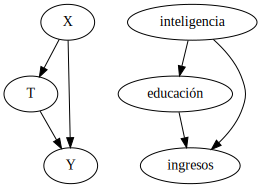

In [8]:
g = gr.Digraph()
g.edge("X", "T")
g.edge("X", "Y")
g.edge("T", "Y")

g.edge("inteligencia", "educación"),
g.edge("inteligencia", "ingresos"),
g.edge("educación", "ingresos")
g

Desafortunadamente, no siempre es posible controlar todas las causas comunes. A veces, hay causas desconocidas o causas conocidas que no podemos medir. El caso de la inteligencia es uno de estos últimos. A pesar de todo el esfuerzo, los científicos aún no han descubierto cómo medir bien la inteligencia. Usaré `U` para denotar variables no medidas aquí. Ahora, supon por un momento que la inteligencia no puede afectar su educación directamente. Afecta qué tan bien te va en las pruebas estandarizadas, pero las pruebas determinan tu nivel de educación ya que abre la posibilidad de una buena universidad. Incluso si no podemos controlar la inteligencia inconmensurable, podemos controlar esos exámenes y cerrar ese camino de puerta trasera.

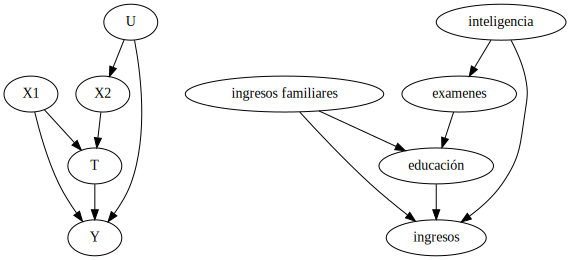

In [9]:
g = gr.Digraph()
g.edge("X1", "T")
g.edge("T", "Y")
g.edge("X2", "T")
g.edge("X1", "Y")
g.edge("U", "X2")
g.edge("U", "Y")

g.edge("ingresos familiares", "educación")
g.edge("educación", "ingresos")
g.edge("examenes", "educación")
g.edge("ingresos familiares", "ingresos")
g.edge("inteligencia", "examenes")
g.edge("inteligencia", "ingresos")
g

En el siguiente gráfico, condicionar en `X1` y `X2`, o `examenes` e `ingresos familiares`, es suficiente para cerrar todos los caminos de puerta trasera entre el tratamiento y el resultado. En otras palabras, $(Y_0, Y_1) \perp T | X1, X2$. Entonces, incluso si no podemos medir todas las causas comunes, aún podemos lograr la independencia condicional si controlamos las variables (medibles) existentes entre el efecto de lo no-medido en el tratamiento. Una nota rápida, también se tiene que $(Y_0, Y_1) \perp T | X1, U$, pero debido a que no podemos observar `U`, no lo podemos condicionar. 

Pero, ¿y si este no es el caso? ¿Qué pasa si la variable no medida causa el tratamiento y el resultado directamente? En el siguiente ejemplo, la inteligencia genera educación e ingresos. Por lo tanto, hay confusión en la relación entre la educación del tratamiento y el resultado del salario. En este caso, no podemos controlar el factor de confusión porque no se puede medir. Sin embargo, tenemos otras variables medibles que pueden actuar como proxy del confusor. Esas variables no están en el camino de la puerta trasera, pero controlarlas ayudará a reducir el sesgo (pero no lo eliminará). Esas variables a veces se denominan factores de confusión sustitutos.

En nuestro ejemplo, no podemos medir la inteligencia, pero podemos medir algunas de sus causas, como la educación del padre y la madre, y algunos de sus efectos, como el coeficiente intelectual o la puntuación de los examenes estandarizados. El control de esas variables sustitutas no es suficiente para eliminar el sesgo, pero ayuda.

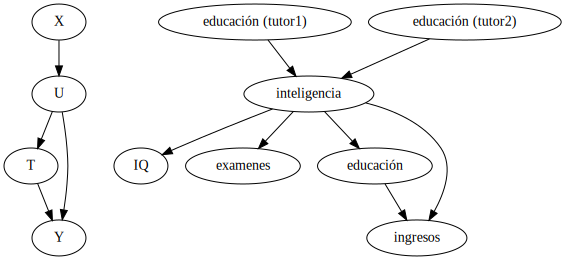

In [10]:
g = gr.Digraph()
g.edge("X", "U")
g.edge("U", "T")
g.edge("T", "Y")
g.edge("U", "Y")

g.edge("inteligencia", "IQ")
g.edge("inteligencia", "examenes")
g.edge("educación (tutor1)", "inteligencia")
g.edge("educación (tutor2)", "inteligencia")

g.edge("inteligencia", "educación")
g.edge("educación", "ingresos")
g.edge("inteligencia", "ingresos")

g

## Sesgo de Selección

Puedes pensar que es una buena idea agregar todo lo que puede medir a tu modelo solo para asegurarse de que no tienes un sesgo de confusión. Bueno, piénsalo de nuevo.

![image.png](../../causal-inference-for-the-brave-and-true/data/img/causal-graph/selection_bias.png)

La segunda fuente más importante de sesgo es lo que llamaremos **sesgo de selección**. Aquí, creo que la distinción entre éste y el sesgo de confusión es constructiva, así que me apegaré a ella. Si el sesgo de confusión ocurre cuando no controlamos por una causa común, el sesgo de selección está más relacionado con los efectos. Precaución aquí, los economistas tienden a referirse a todo tipo de sesgos como sesgo de selección. 

A menudo, el sesgo de selección surge cuando controlamos más variables de las que deberíamos. Podría darse el caso de que el tratamiento y el resultado potencial sean marginalmente independientes pero se vuelvan dependientes una vez que condicionemos un _colisionador_. 

Imagina que con la ayuda de algún milagro, finalmente puedes aleatorizar la educación para medir su efecto en los salarios. Pero solo para asegurarte de que no tendrá confusión, controlas muchas variables. Entre ellos, controlas las inversiones. Pero la inversión no es una causa común de educación y salario. En cambio, es una consecuencia de ambos. Las personas más educadas ganan más e invierten más. Además, los que ganan más invierten más. Dado que la inversión es un _colisionador_, al condicionarla, estás abriendo un segundo camino entre el tratamiento y el resultado, lo que hará que sea más difícil medir el efecto directo. Una forma de pensar en esto es que al controlar las inversiones, observas pequeños grupos de la población donde la inversión es la misma y luego encuentras el efecto de la educación en esos grupos. Pero al hacerlo, también estás indirecta e inadvertidamente impidiendo que los salarios cambien mucho. Como resultado, no podrás ver cómo la educación cambia los salarios porque no está permitiendo que los salarios cambien como deberían. 

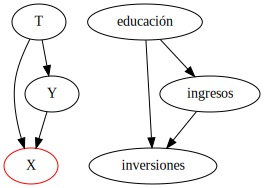

In [11]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.node("X", "X", color="red")

g.edge("educación", "inversiones")
g.edge("educación", "ingresos")
g.edge("ingresos", "inversiones")

g

Imagina que las inversiones y la educación toman solo 2 valores. La gente invierte o no. Son educados o no. Inicialmente, cuando no controlamos las inversiones, el término de sesgo es cero: $E[Y_0|T=1] - E[Y_0|T=0] = 0$ porque la educación fue aleatorizada. Esto significa que el salario que tendrían las personas si no recibiesen educación $ingresos_0$ es el mismo si reciben o no el tratamiento de educación. Pero, ¿qué sucede si condicionamos las inversiones?

Mirando a los que invierten, probablemente tengamos el caso de que $E[Y_0|T=0, I=1] > E[Y_0|T=1, I=1]$. En otras palabras, entre los que invierten, los que logran hacerlo aún sin educación son más independientes de la educación para lograr altos ingresos. Por eso, el salario que tienen esas personas, $ingresos_0|T=0$, es probablemente más alto que el salario que tendría el grupo educado si no tuviera educación, $ingresos_0|T=1$. Se puede aplicar un razonamiento similar a aquellos que no invierten, donde probablemente también tengamos $E[Y_0|T=0, I=0] > E[Y_0|T=1, I=0]$. Aquellos que no invierten, ni siquiera con educación, probablemente tendrían un salario más bajo si no hubieran recibido la educación, que aquellos que no invirtieron pero no tuvieron educación. 

Para usar un argumento puramente gráfico, si alguien invierte sabiendo que tiene una alta educación, se explica la segunda causa, que es el salario. Condicionado a invertir, la educación superior se asocia con salarios bajos y tenemos un sesgo negativo $E[Y_0|T=0, I=i] > E[Y_0|T=1, I=i]$. 

Como nota al margen, todo lo que hemos discutido es cierto si condicionamos a cualquier descendiente de un efecto común.

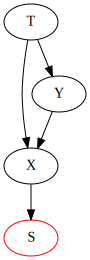

In [12]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.edge("X", "S")
g.node("S", "S", color="red")
g

Algo similar sucede cuando condicionamos a un _mediador_ del tratamiento. Un _mediador_ es una variable entre el tratamiento y el resultado. Por ejemplo, supon nuevamente que puede aleatorizar la educación. Pero, para estar seguro, decides controlar si la persona tenía o no un trabajo administrativo. Una vez más, este condicionamiento sesga la estimación del efecto causal. Esta vez, no porque abre un _camino de puerta de entrada_ con un _colisionador_, sino porque cierra uno de los canales por los que opera el tratamiento. En nuestro ejemplo, conseguir un trabajo administrativo es una forma en que una mayor educación conduce a un salario más alto. Al controlarlo, cerramos este canal y dejamos abierto solo el efecto directo de la educación sobre los salarios.

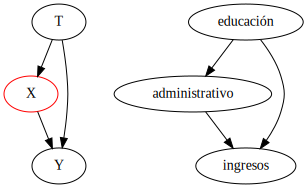

In [13]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("X", "Y")
g.node("X", "X", color="red")

g.edge("educación", "administrativo")
g.edge("educación", "ingresos")
g.edge("administrativo", "ingresos")

g

Para dar un argumento final, sabemos que, debido a la aleatorización, el sesgo es cero $E[Y_0|T=0] - E[Y_0|T=1] = 0$. Sin embargo, si condicionamos a los empleados administrativos, tenemos que $E[Y_0|T=0, WC=1] > E[Y_0|T=1, WC=1]$. Esto se debe a que aquellos que logran obtener un trabajo de cuello blanco incluso sin educación son probablemente más trabajadores que aquellos que requieren la ayuda de la educación para conseguir el mismo trabajo. Con el mismo razonamiento, $E[Y_0|T=0, WC=0] > E[Y_0|T=1, WC=0]$ porque aquellos que no consiguieron un trabajo administrativo incluso con educación probablemente sean menos trabajadores que los que no, pero tampoco tenían educación. 

En nuestro caso, condicionar al _mediador_ induce un sesgo negativo. Hace que el efecto de la educación parezca más bajo de lo que realmente es. Este es el caso porque el efecto causal es positivo. Si el efecto fuera negativo, el condicionamiento sobre un mediador tendría un sesgo positivo. En todos los casos, este tipo de condicionamiento hace que el efecto parezca más débil de lo que es. 

Para decirlo de manera más poética, supon que tiene que elegir entre dos candidatos para un puesto en tu empresa. Ambos tienen logros profesionales igualmente impresionantes, pero uno no tiene un título de educación superior. ¿Cuál deberías elegir? Por supuesto, debes ir con el que no tiene educación superior porque logró lograr las mismas cosas que el otro pero tenía las probabilidades en su contra.

![image.png](../../causal-inference-for-the-brave-and-true/data/img/causal-graph/three_bias.png)

## Key Ideas

Hemos estudiado los modelos gráficos como lenguaje para comprender y expresar mejor las ideas de causalidad. Hicimos un resumen rápido de las reglas de la independencia condicional en un gráfico. Esto nos ayudó a explorar tres estructuras que pueden generar sesgos.

El _confusor_, lo que ocurre cuando el tratamiento y el resultado tienen una causa común que no tenemos en cuenta ni controlamos. El segundo es el _sesgo de selección_ debido al condicionamiento sobre un efecto común. La tercera estructura es también una forma de _sesgo de selección_, esta vez debido al control excesivo de las variables medibles. Este control excesivo podría conducir a un sesgo incluso si el tratamiento se asignó al azar. El sesgo de selección a menudo se puede solucionar simplemente sin hacer nada, por lo que es peligroso. Dado que estamos sesgados hacia la acción, tendemos a ver las ideas que controlan las cosas como inteligentes cuando pueden estar haciendo más daño que bien. 

## Referencias

Me gusta pensar en este libro como un tributo a Joshua Angrist, Alberto Abadie y Christopher Walters por su increíble clase de Econometría. La mayoría de las ideas aquí están tomadas de sus clases en la Asociación Económica Americana. Verlos es lo que me mantiene cuerdo durante este difícil año de 2020.
* [Cross-Section Econometrics](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
* [Mastering Mostly Harmless Econometrics](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)

También me gustaría hacer referencia a los increíbles libros de Angrist. Me han demostrado que la Econometría, o 'Metria como la llaman, no solo es extremadamente útil sino también profundamente divertida.

* [Mostly Harmless Econometrics](https://www.mostlyharmlesseconometrics.com/)
* [Mastering 'Metrics](https://www.masteringmetrics.com/)

Mi referencia final es el libro de Miguel Hernan y Jamie Robins. Ha sido mi compañero de confianza en las preguntas causales más espinosas que tuve que responder.

* [Causal Inference Book](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)

![img](../../causal-inference-for-the-brave-and-true/data/img/poetry.png)

## Contribuye

_Inferencia Causal para los Valientes y Verdaderos_ es un material de código abierto sobre Inferencia Causal, la Estadística de la Ciencia. Utiliza solo software libre, basado en Python. Su objetivo es ser accesible monetaria e intelectualmente.
Si encuentras este libro valioso y quieres apoyarlo, por favor visita [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true). Si no estás listo para contribuir financieramente, también puedes ayudar corrigiendo errores tipográficos, sugiriendo ediciones o dando tu opinión sobre pasajes que no entendiste. Sólo tienes que ir al repositorio del libro y [abrir un _issue_](https://github.com/matheusfacure/python-causality-handbook/issues). Finalmente, si te gustó este contenido, compártelo con otras personas a quienes les pueda resultar útil y dale una [estrella en GitHub](https://github.com/matheusfacure/python-causality-handbook/stargazers).